# Customer Churn Prediction using Classification

### The goal of this project is to predict whether a cutomer will churn or not based on customer data available to telecom organizations.
### While also extracting insights about the influence of different features on the probability of customer churn.

## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

## Importing Libraries \& Dataset

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn-v0_8")

#df = pd.read_csv('https://raw.githubusercontent.com/TameemAlghazaly/Data-Science-Projects/main/Customer%20Churn%20Classification/telecom_churn.csv')
df = pd.read_csv('telecom_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection & Cleaning

In [68]:
df.isnull().sum() / len(df) * 100

,0
customerID,0.795116
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.000000
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.000000
OnlineSecurity,0.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6987 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [70]:
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$', '', regex=False)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7/m,$151.65,Yes


In [71]:
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('/m', '', regex=False)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,$151.65,Yes


In [72]:
df['TotalCharges'] = df['TotalCharges'].str.replace('$', '', regex=False)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [73]:
# prompt: find the unique categories in the column total charges

df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [74]:
df=df.replace(" ",np.nan)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6987 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

**Filling the missing values of Total Charges by multiplying the tenure by the monthly charges**

In [76]:
df[["MonthlyCharges", "TotalCharges"]] = df[["MonthlyCharges", "TotalCharges"]].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6987 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [77]:
df['TotalCharges'] = df.apply(
    lambda row: row['tenure']*row['MonthlyCharges'] if np.isnan(row['TotalCharges']) else row['TotalCharges'],
    axis=1
)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [78]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [79]:
df.isnull().sum()

,0
customerID,56
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [80]:
for col in df.select_dtypes(object).columns:
    print(f"{col}: {df[col].unique()}\n")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn: ['No' 'Yes']



In [81]:
for col in df.select_dtypes(object).columns:
    df[col] = df[col].str.strip()
    df[col] = df[col].replace(' ', np.nan, regex=False)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Encoding the data with Label encoding since most features have an order withign them and we care more about one class over the other.

In [82]:
df['Churn'] = df['Churn'].astype('category').cat.codes

In [83]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")


gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


**Dropping cutomer id as it is unique to each cutomer and doesn't contribute to customer churn**

In [84]:
df.drop(['customerID'], axis="columns", inplace=True)

In [85]:
df_encoded = pd.get_dummies(df, columns=df.select_dtypes(object).columns)
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


## Exploratory Data Analysis

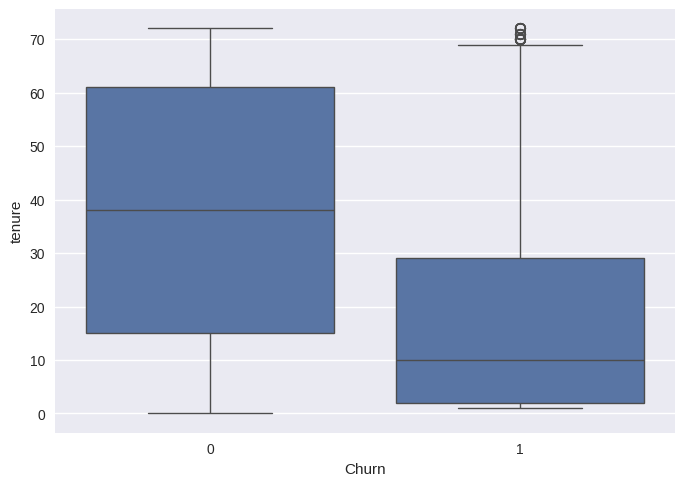

In [86]:
# prompt: box plot of total charges for each churn class

sns.boxplot(x='Churn', y='tenure', data=df);


#### 75% of churned customers stayed with the company 2.5 years before leaving. 50% of churned customers left in just 10 months.

#### The most correlated attributes are month to month contracts and no online security and no tech support which are positivly correlated with churn , while tenure and two year contracts are negatively correlated with churn .

<Axes: >

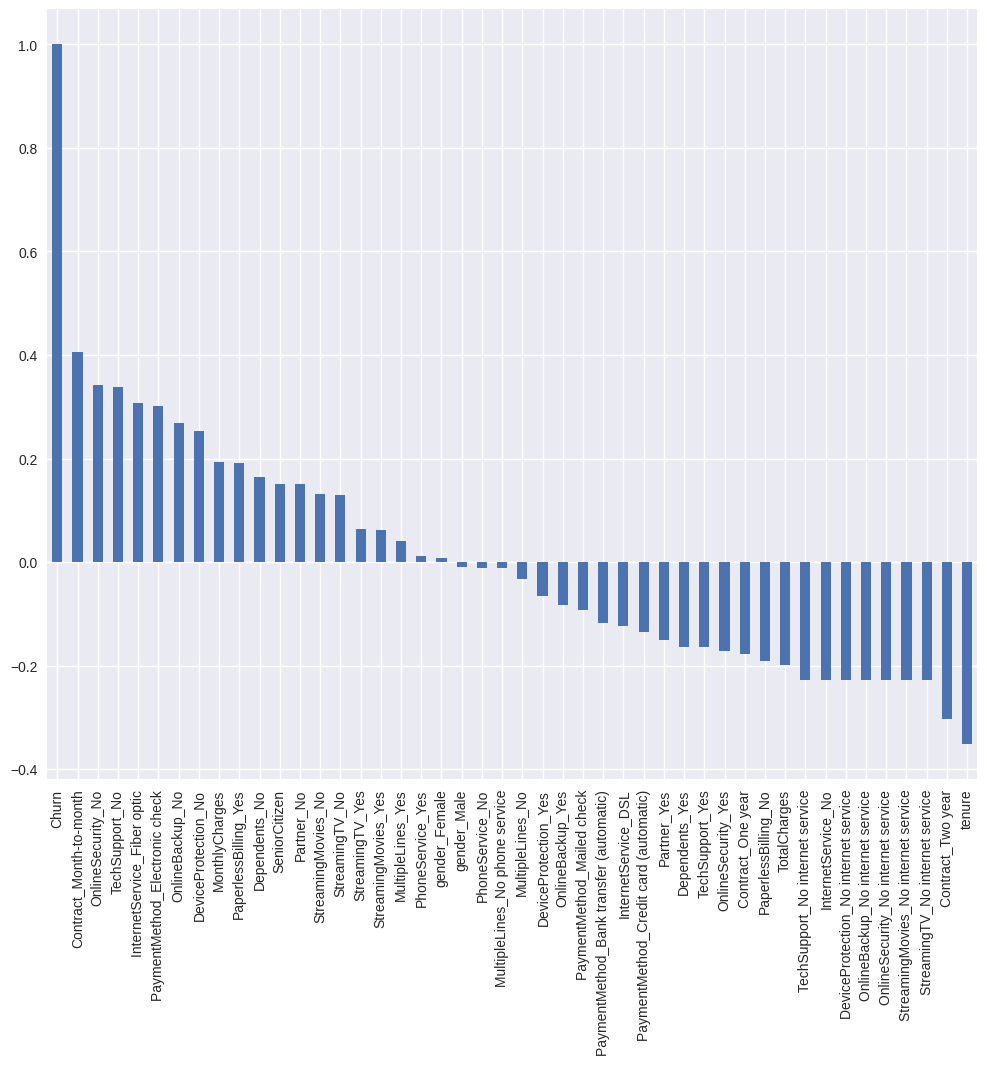

In [87]:
plt.figure(figsize=(12,10))
df_encoded.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

#### According to the barplot senior citizens are more likely to churn

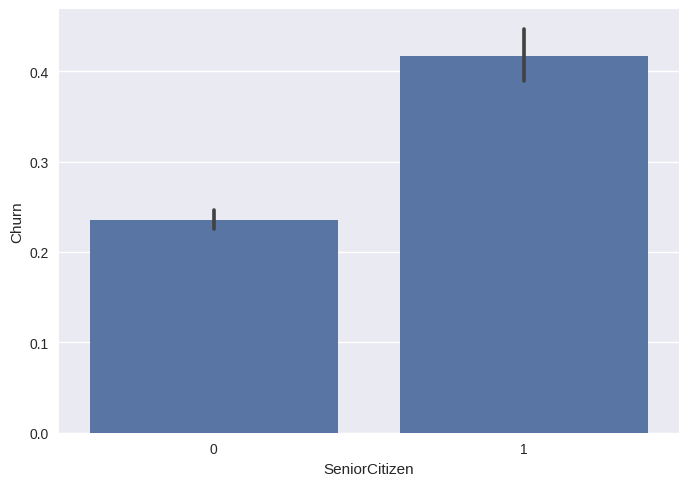

In [88]:
ax = sns.barplot(x='SeniorCitizen', y='Churn', data=df);

#### According to the barplot Electronic check Payment method has the highet churn rate

/tmp/ipython-input-89-2268724081.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90);


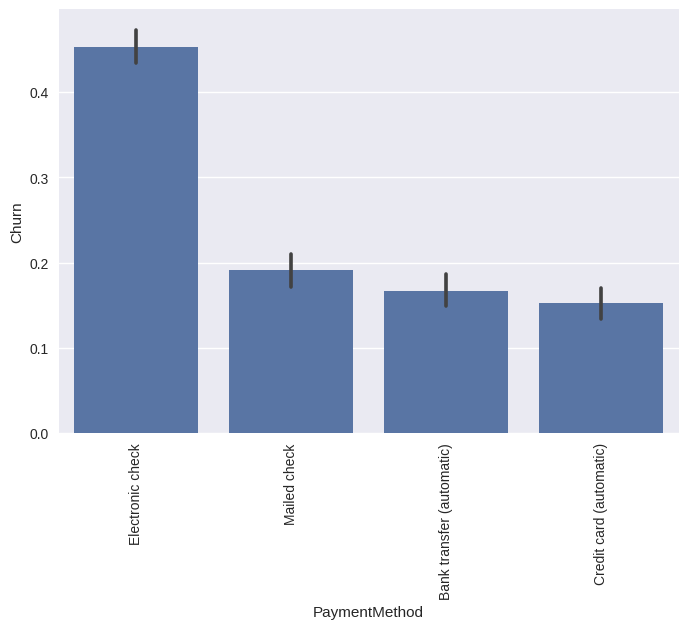

In [89]:
ax = sns.barplot(x='PaymentMethod', y='Churn', data=df);
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

## Modelling

In [90]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

## Evaluation

### As the Churn class is more important than the not churn class we will use the F1 score to test the model .

In [91]:
from sklearn.metrics import f1_score

y_pred = lr_model.predict(X_test)
f1_score(y_test, y_pred)

0.6263008514664143

In [92]:
lr_model.score(X_test, y_test)

0.8130619971604354

### We will apply the Random Forest model and compare between the 2 models with the F1 score since the churn class is more important to us.

In [93]:
from sklearn.ensemble import RandomForestClassifier

random_forest= RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [94]:
from sklearn.metrics import f1_score

y_pred = random_forest.predict(X_test)
f1_score(y_test, y_pred)

0.5496957403651116

In [95]:
random_forest.score(X_test, y_test)

0.7898722195929957

### According to the F1 score and the accuracy score the logistic regression model performs better than the random forest model in both f1 score and accuracy score.


--- Training CatBoost Model ---
CatBoost Cross-Validation ROC-AUC scores: [0.82304175 0.84997849 0.82394725 0.83528331 0.85728891]
CatBoost Mean CV ROC-AUC: 0.8379

--- CatBoost Model Evaluation on Test Set ---
Confusion Matrix:
[[1398  141]
 [ 272  302]]
Precision: 0.6817
Recall: 0.5261
ROC-AUC: 0.8574

--- Training XGBoost Model ---
XGBoost Cross-Validation ROC-AUC scores: [0.81416994 0.84572979 0.81473023 0.82547678 0.84904112]
XGBoost Mean CV ROC-AUC: 0.8298

--- XGBoost Model Evaluation on Test Set ---
Confusion Matrix:
[[1385  154]
 [ 273  301]]
Precision: 0.6615
Recall: 0.5244
ROC-AUC: 0.8498

--- Plotting ROC Curves ---


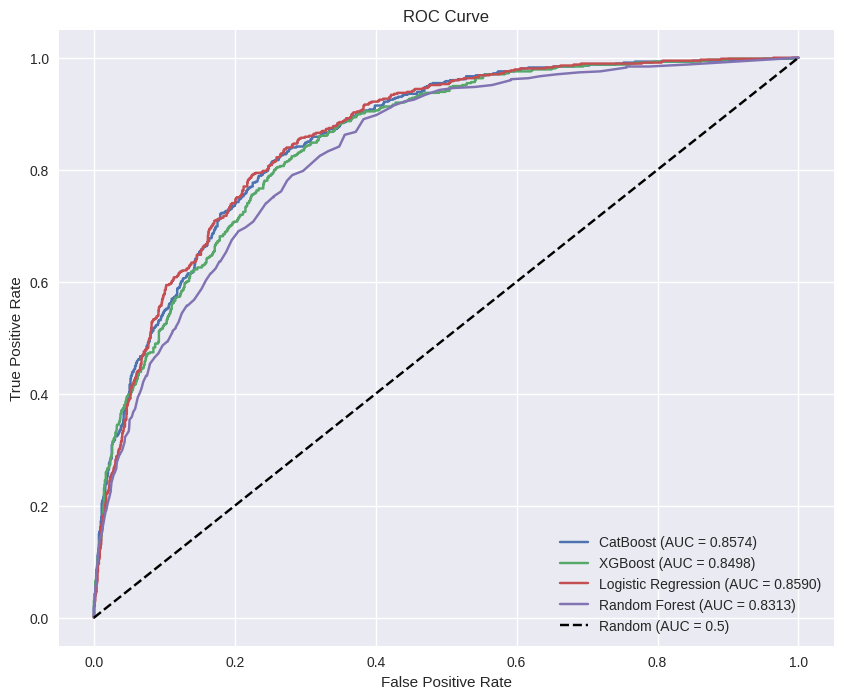


Models Trained, Cross-Validated, and Evaluated.


In [101]:
# prompt: create a catboost and xgboost models using cross validation and evaluate using confusion matrix percesion recall and ROC-auc

#!pip install catboost
#!pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
from catboost import CatBoostClassifier, Pool
import xgboost as xgb

# Assuming df_encoded and the train/test splits (X_train, X_test, y_train, y_test) are already defined from the preceding code

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- CatBoost Model ---
print("--- Training CatBoost Model ---")
# Identify categorical features for CatBoost
# Need to use the original dataframe before one-hot encoding to identify original categorical columns
# Then map these to the columns in df_encoded
original_categorical_cols = [col for col in df.columns if df[col].dtype == object]
# Find the corresponding encoded columns in df_encoded
# For one-hot encoded data, CatBoost might not perform as well as it's designed for categorical features
# Let's identify the indices of the one-hot encoded columns that originated from categorical features
# This is a bit tricky with automatic get_dummies, a better approach is to use CatBoost directly on original data
# if possible, or identify the columns manually if few.
# For simplicity with existing df_encoded, we will treat all features as potentially numerical/binary,
# but CatBoost can still handle this.
# Alternatively, rebuild the data pipeline to use CatBoost's internal handling of categoricals.
# Let's assume for now that df_encoded is our feature set and we don't pass specific cat_features indices.
# If you had the original dataframe (df) and target (y_original), you could do:
# train_pool = Pool(data=df[original_numerical_cols + original_categorical_cols],
#                   label=y_original,
#                   cat_features=original_categorical_cols)
# test_pool = Pool(data=df_test[original_numerical_cols + original_categorical_cols],
#                  label=y_test_original,
#                  cat_features=original_categorical_cols)
# For now, using df_encoded:

catboost_model = CatBoostClassifier(iterations=100,  # Reduced for faster execution
                                    learning_rate=0.1,
                                    depth=6,
                                    loss_function='Logloss',
                                    eval_metric='AUC',
                                    random_state=42,
                                    verbose=False) # Set to True for training output

# Cross-validation for CatBoost
catboost_cv_scores = cross_val_score(catboost_model, X_train, y_train, cv=cv, scoring='roc_auc')
print(f"CatBoost Cross-Validation ROC-AUC scores: {catboost_cv_scores}")
print(f"CatBoost Mean CV ROC-AUC: {np.mean(catboost_cv_scores):.4f}")

# Train CatBoost on the full training data
catboost_model.fit(X_train, y_train)

# Evaluate CatBoost on the test set
y_pred_catboost = catboost_model.predict(X_test)
y_pred_proba_catboost = catboost_model.predict_proba(X_test)[:, 1]

print("\n--- CatBoost Model Evaluation on Test Set ---")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_catboost))
print(f"Precision: {precision_score(y_test, y_pred_catboost):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_catboost):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_catboost):.4f}")

# --- XGBoost Model ---
print("\n--- Training XGBoost Model ---")

xgboost_model = xgb.XGBClassifier(objective='binary:logistic',
                                  n_estimators=100, # Reduced for faster execution
                                  learning_rate=0.1,
                                  max_depth=6,
                                  eval_metric='logloss', # Or 'auc'
                                  random_state=42)

# Cross-validation for XGBoost
xgboost_cv_scores = cross_val_score(xgboost_model, X_train, y_train, cv=cv, scoring='roc_auc')
print(f"XGBoost Cross-Validation ROC-AUC scores: {xgboost_cv_scores}")
print(f"XGBoost Mean CV ROC-AUC: {np.mean(xgboost_cv_scores):.4f}")

# Train XGBoost on the full training data
xgboost_model.fit(X_train, y_train)

# Evaluate XGBoost on the test set
y_pred_xgboost = xgboost_model.predict(X_test)
y_pred_proba_xgboost = xgboost_model.predict_proba(X_test)[:, 1]

print("\n--- XGBoost Model Evaluation on Test Set ---")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgboost))
print(f"Precision: {precision_score(y_test, y_pred_xgboost):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgboost):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_xgboost):.4f}")

# --- Plotting ROC Curves ---
print("\n--- Plotting ROC Curves ---")

fpr_catboost, tpr_catboost, _ = roc_curve(y_test, y_pred_proba_catboost)
auc_catboost = roc_auc_score(y_test, y_pred_proba_catboost)

fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test, y_pred_proba_xgboost)
auc_xgboost = roc_auc_score(y_test, y_pred_proba_xgboost)

# Assuming Logistic Regression and Random Forest models were trained earlier in the notebook
# Let's get their probabilities to plot ROC curves as well for comparison
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

y_pred_proba_rf = random_forest.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)


plt.figure(figsize=(10, 8))
plt.plot(fpr_catboost, tpr_catboost, label=f'CatBoost (AUC = {auc_catboost:.4f})')
plt.plot(fpr_xgboost, tpr_xgboost, label=f'XGBoost (AUC = {auc_xgboost:.4f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("\nModels Trained, Cross-Validated, and Evaluated.")